<a href="https://colab.research.google.com/github/bayuryunarko/ML-in-Financial-Analysis/blob/main/04MLFinancialAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigating Stylized Facts of asset returns

In [ ]:
pip install yfinance

In [2]:
# import lib
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt

In [4]:
# download data
df = yf.download('^GSPC', 
                       start= '1985-01-01',
                       end = '2018-12-31',
                       progress= False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1985-01-02,167.199997,167.199997,165.190002,165.369995,165.369995,67820000
1985-01-03,165.369995,166.110001,164.380005,164.570007,164.570007,88880000
1985-01-04,164.550003,164.550003,163.360001,163.679993,163.679993,77480000
1985-01-07,163.679993,164.710007,163.679993,164.240005,164.240005,86190000
1985-01-08,164.240005,164.589996,163.910004,163.990005,163.990005,92110000


In [5]:
df = df[['Adj Close']].rename(columns={'Adj Close': 'adj_close'})
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))
df = df[['adj_close', 'log_rtn']].dropna(how='any')
df.head()

,adj_close,log_rtn
Date,,
1985-01-03,164.570007,-0.004849
1985-01-04,163.679993,-0.005423
1985-01-07,164.240005,0.003416
1985-01-08,163.990005,-0.001523
1985-01-09,165.179993,0.007230


## Fact 1 - Non-Gaussian distribution of return

In [6]:
# calculate the normal PDF using the mean and standard deviation of the observed returns
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


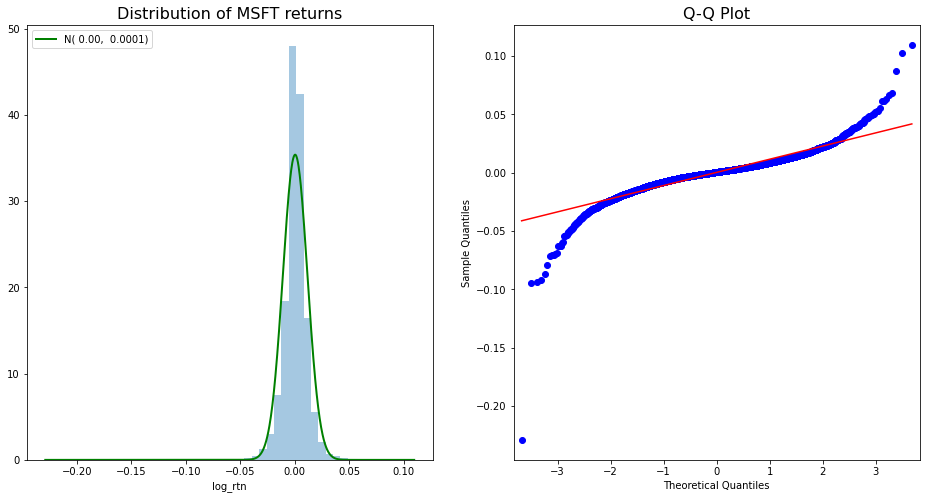

In [25]:
# plot the histogram and the Q-Q plot
fig, ax = plt.subplots(1,2, figsize=(16,8))

# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of MSFT returns', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2, label=f'N({mu: .2f}, {sigma**2: .4f})')
ax[0].legend(loc='upper left');

# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot', fontsize=16)

plt.show()

In [23]:
jb_test = scs.jarque_bera(df.log_rtn.values)

# print the summary statistics of the log return
print('-------------------Descriptive Statistics--------------------')
print('Range of date : ', min(df.index.date), '-', max(df.index.date))
print('Number of observations :', df.shape[0])
print(f'Mean : {df.log_rtn.mean():.4f}')
print(f'Median : {df.log_rtn.median():.4f}')
print(f'Min : {df.log_rtn.min():.4f}')
print(f'Max : {df.log_rtn.max():.4f}')
print(f'Standard deviation : {df.log_rtn.std():.4f}')
print(f'Skewness : {df.log_rtn.skew():.4f}')
print(f'Kurtosis : {df.log_rtn.kurtosis():.4f}')
print(f'Jarque Bera Statistics : {jb_test[0]:.2f} with p-value {jb_test[1]:.2f}')

-------------------Descriptive Statistics--------------------
Range of date :  1985-01-03 - 2018-12-28
Number of observations : 8568
Mean : 0.0003
Median : 0.0006
Min : -0.2290
Max : 0.1096
Standard deviation : 0.0113
Skewness : -1.2628
Kurtosis : 28.0156
Jarque Bera Statistics : 282134.38 with p-value 0.00
